In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
import compression as C
from matplotlib.pyplot import imshow

%matplotlib inline

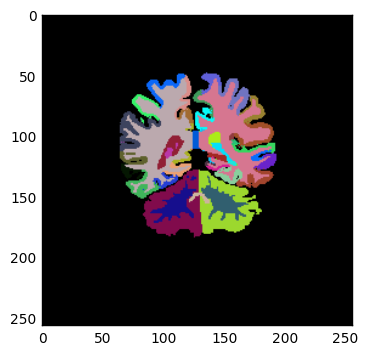

In [3]:
# Load data
#data = C.Util.load_data('mri')
# Fritz only
data = C.Util.load_data('mri', -1, '/Volumes/FFRITZ/cs222/')
imshow(C.Util.colorize(data[100]))

In [4]:
# SETUP

# Iterations
N = 1

# DEFAULT --------------------------------------------------
# Compression methods
def_coms = [
    C.BOCKWURST,
    C.LZMA,
    C.ZLIB
]

# Encoding methods
def_encs = [
    C.NE,
    C.NG,
    C.RLE
]

# ALL ------------------------------------------------------
# compression methods
all_coms = [
    C.BOCKWURST,
    C.BROTLI,
    C.BZ2,
    C.JPEG2000,
    C.LZ78,
    C.LZF,
    C.LZMA,
    C.LZO,
    C.LZW,
    C.PNG,
    C.X264,
    C.ZLIB,
    C.ZOPFLI,
    C.ZSTD
]

# encoding methods
all_encs = [
    C.NE,
    C.RLE,
    C.NG,
    C.BOCKWURST
]

# ENCODING ONLY -------------------------------------------
# Compression methods
enc_only_coms = [
    C.NC
]

# encoding methods
enc_only_encs = [
    C.RLE,
    C.NG,
    C.BOCKWURST
]

In [21]:
# RUN: default
results_default = C.Util.run_experiments(data=data, N=N, com_alg=def_coms, enc_alg=def_encs, verbose=True)

> NE + Bockwurst
Compression Method: Bockwurst
Encoding Method: NE
Input Size: 629.1456 MB
Output Size: 0.880576 MB
Ratio: 714.470528381
Total Compression Speed [MB/s]: 49.082203501
Total Decompression Speed [MB/s]: 22.0286045489
Compression (Only) Speed [MB/s]: 49.0822190208
Decompression (Only) Speed [MB/s]: 22.0286067556
Encoding Speed [MB/s]: 155225170.98
Decoding Speed [MB/s]: 219902325.555



KeyboardInterrupt: 

In [28]:
# RUN: all
results_all = C.Util.run_experiments(data=data, N=N, com_alg=all_coms, enc_alg=all_encs, verbose=True)

> NE + BZip2
Compression Method: BZip2
Encoding Method: NE
Input Size: 16.777216 MB
Output Size: 0.057641 MB
Ratio: 291.063930189
Total Compression Speed [MB/s]: 3.78738714481
Total Decompression Speed [MB/s]: 58.2123085349
Compression (Only) Speed [MB/s]: 3.78738897941
Decompression (Only) Speed [MB/s]: 58.2127804669
Encoding Speed [MB/s]: 7818749.35307
Decoding Speed [MB/s]: 7180484.09976

> RLE + BZip2
Compression Method: BZip2
Encoding Method: RLE
Input Size: 16.777216 MB
Output Size: 0.062432 MB
Ratio: 268.727831881
Total Compression Speed [MB/s]: 108.668534482
Total Decompression Speed [MB/s]: 173.257549167
Compression (Only) Speed [MB/s]: 494.743088116
Decompression (Only) Speed [MB/s]: 939.335794547
Encoding Speed [MB/s]: 139.255503437
Decoding Speed [MB/s]: 212.441768958

> Neuroglancer + BZip2
Compression Method: BZip2
Encoding Method: Neuroglancer
Input Size: 16.777216 MB
Output Size: 0.073294 MB
Ratio: 228.902993424
Total Compression Speed [MB/s]: 42.2077577514
Total Decomp

KeyboardInterrupt: 

In [7]:
# RUN: encoding only
results_enc_only = C.Util.run_experiments(data=data, N=N, com_alg=enc_only_coms, enc_alg=enc_only_encs, verbose=True)

> RLE + NC
Compression Method: NC
Encoding Method: RLE
Input Size: 134.217728 MB
Output Size: 5.101168 MB
Ratio: 26.3111757935
Total Compression Speed [MB/s]: 53.0243125768
Total Decompression Speed [MB/s]: 164.8883078
Compression (Only) Speed [MB/s]: 70368744.1777
Decompression (Only) Speed [MB/s]: 140737488.355
Encoding Speed [MB/s]: 53.0243525317
Decoding Speed [MB/s]: 164.888500984



../compression/util.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  dcom_speed = dec_MB / np.mean(dcom_speed)


> Neuroglancer + NC
Compression Method: NC
Encoding Method: Neuroglancer
Input Size: 134.217728 MB
Output Size: 2.251056 MB
Ratio: 59.6243398654
Total Compression Speed [MB/s]: 104.917988665
Total Decompression Speed [MB/s]: 360.896354829
Compression (Only) Speed [MB/s]: 43303842.5709
Decompression (Only) Speed [MB/s]: inf
Encoding Speed [MB/s]: 104.918242864
Decoding Speed [MB/s]: 360.896354829

> Bockwurst + NC
Compression Method: NC
Encoding Method: Bockwurst
Input Size: 134.217728 MB
Output Size: 4.228912 MB
Ratio: 31.7381227134
Total Compression Speed [MB/s]: 27.6027085333
Total Decompression Speed [MB/s]: 8.75646032504
Compression (Only) Speed [MB/s]: 70368744.1777
Decompression (Only) Speed [MB/s]: 140737488.355
Encoding Speed [MB/s]: 27.6027193607
Decoding Speed [MB/s]: 8.75646086985



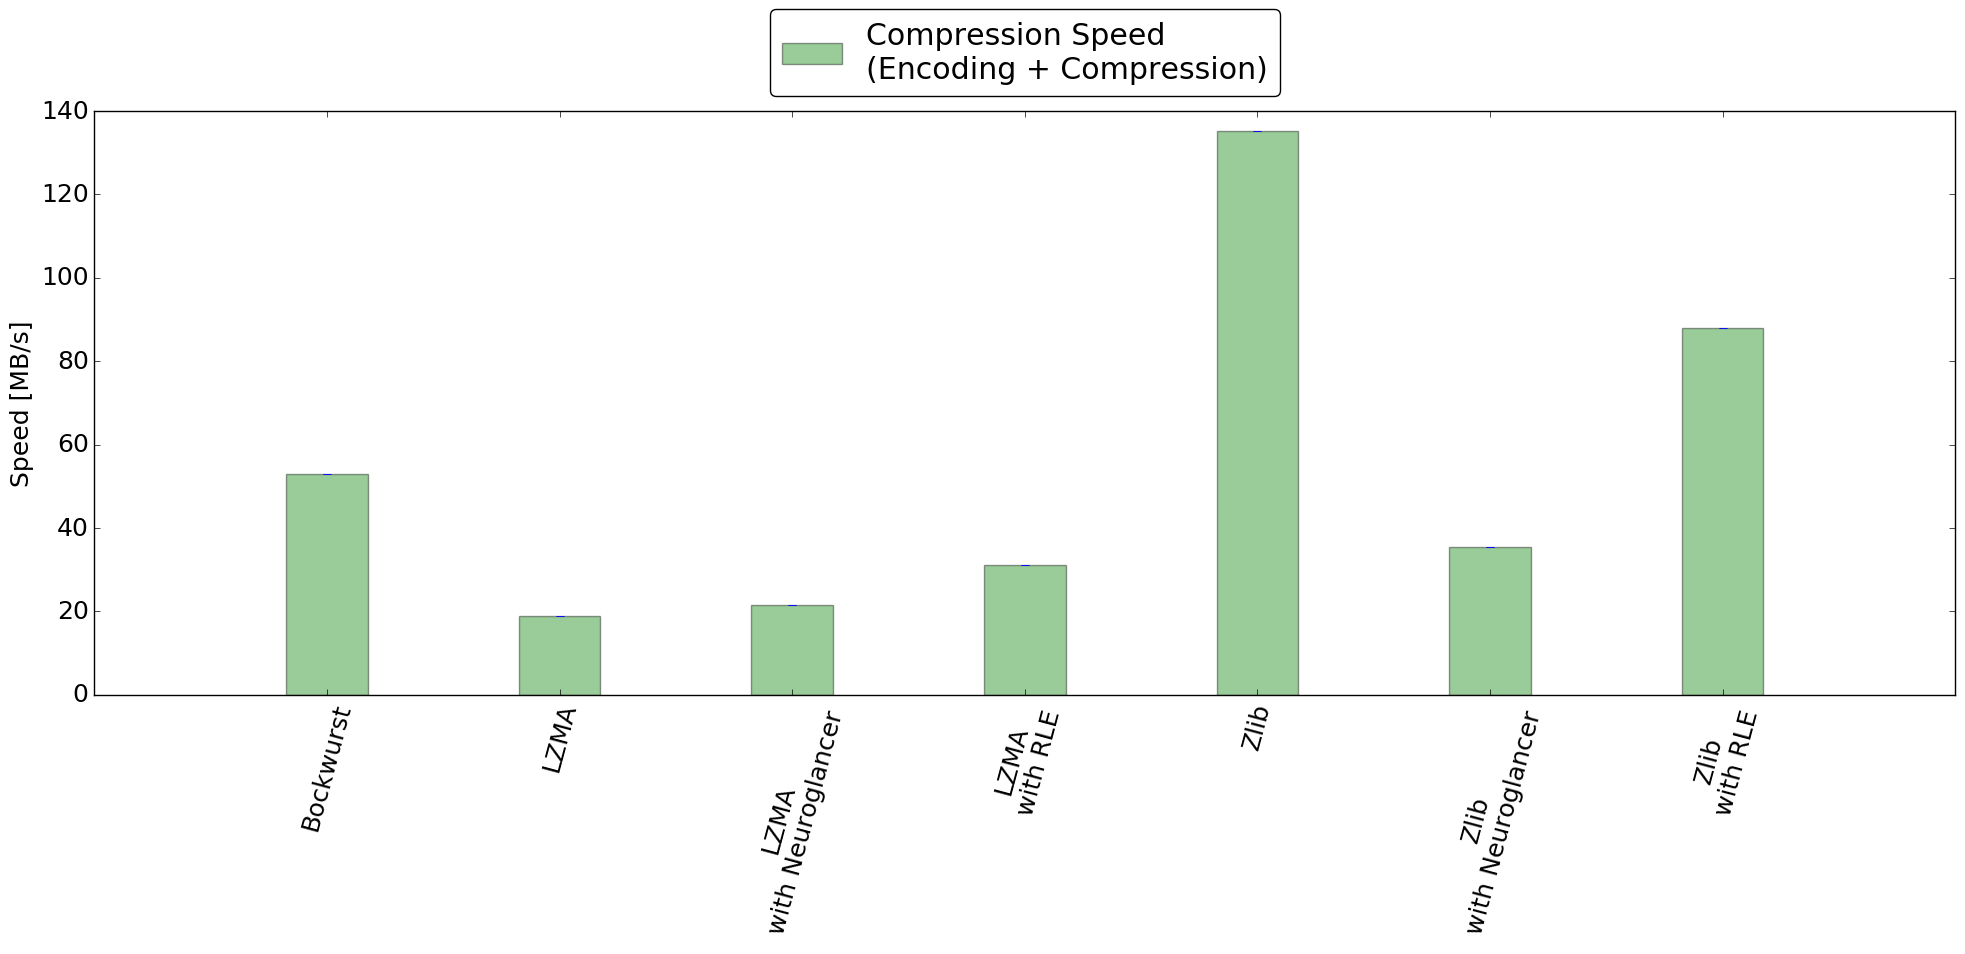

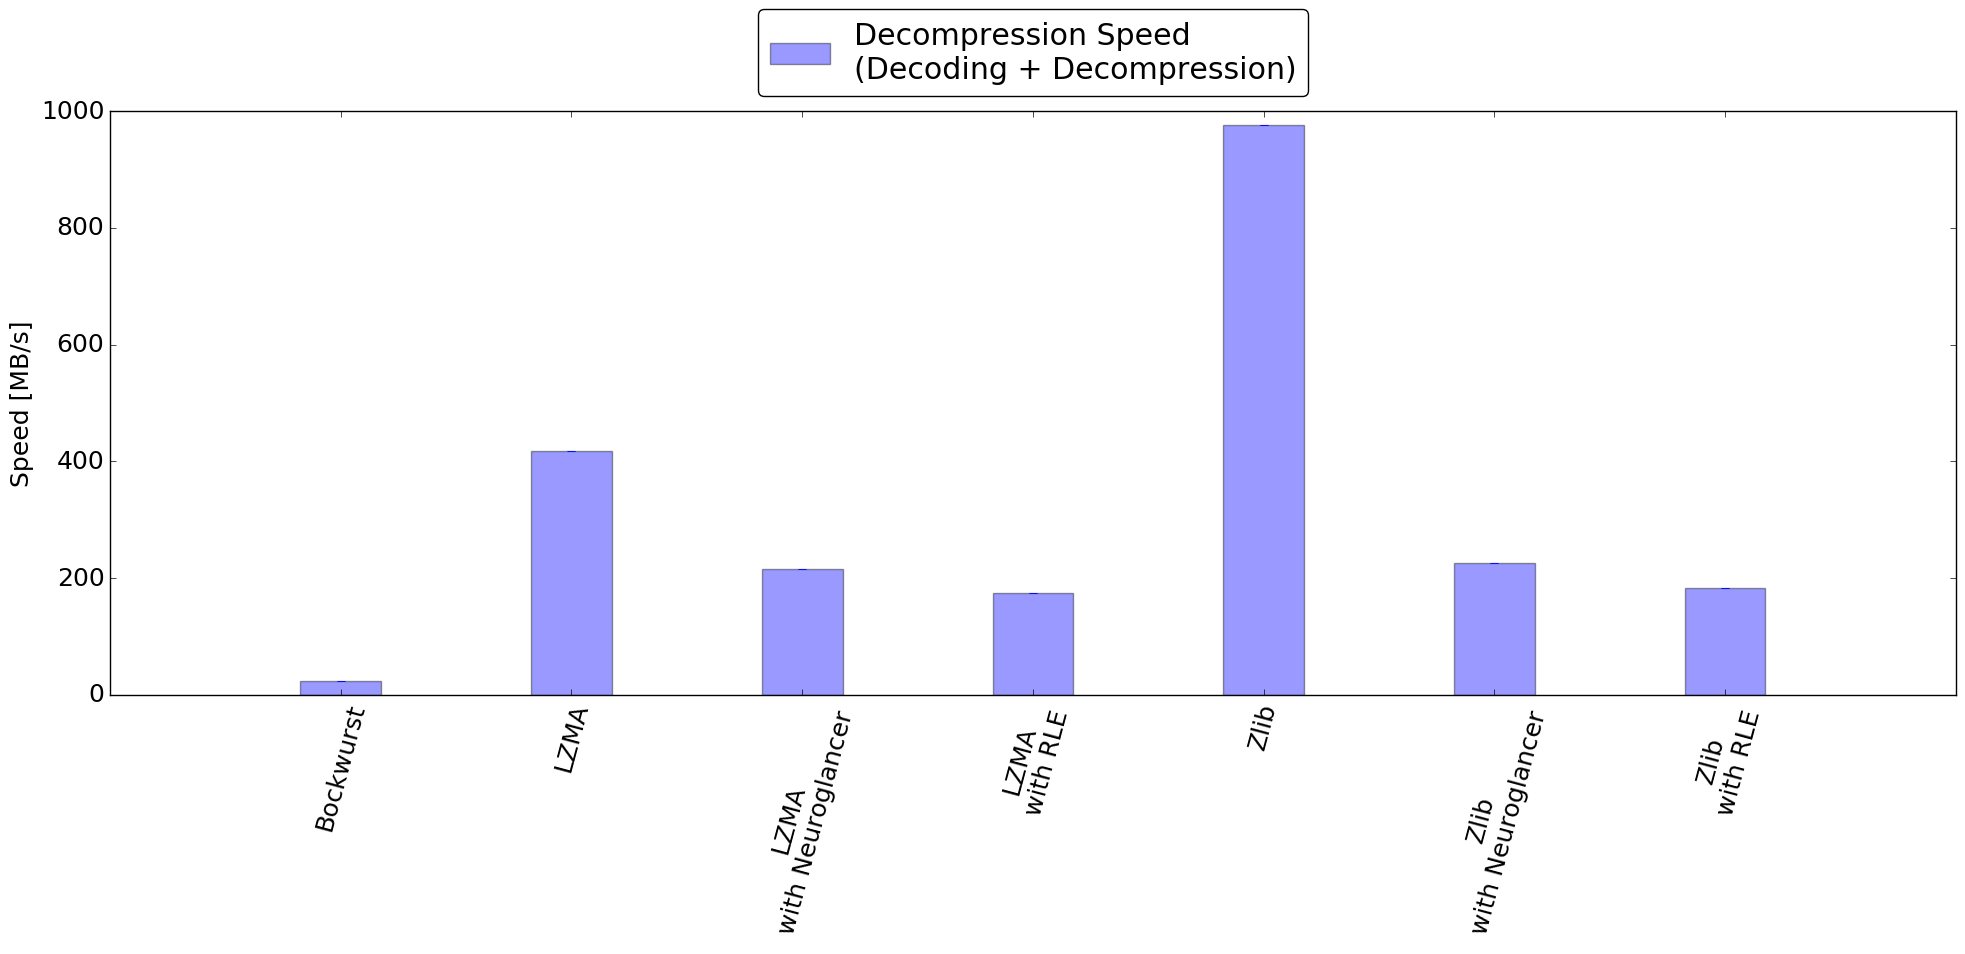

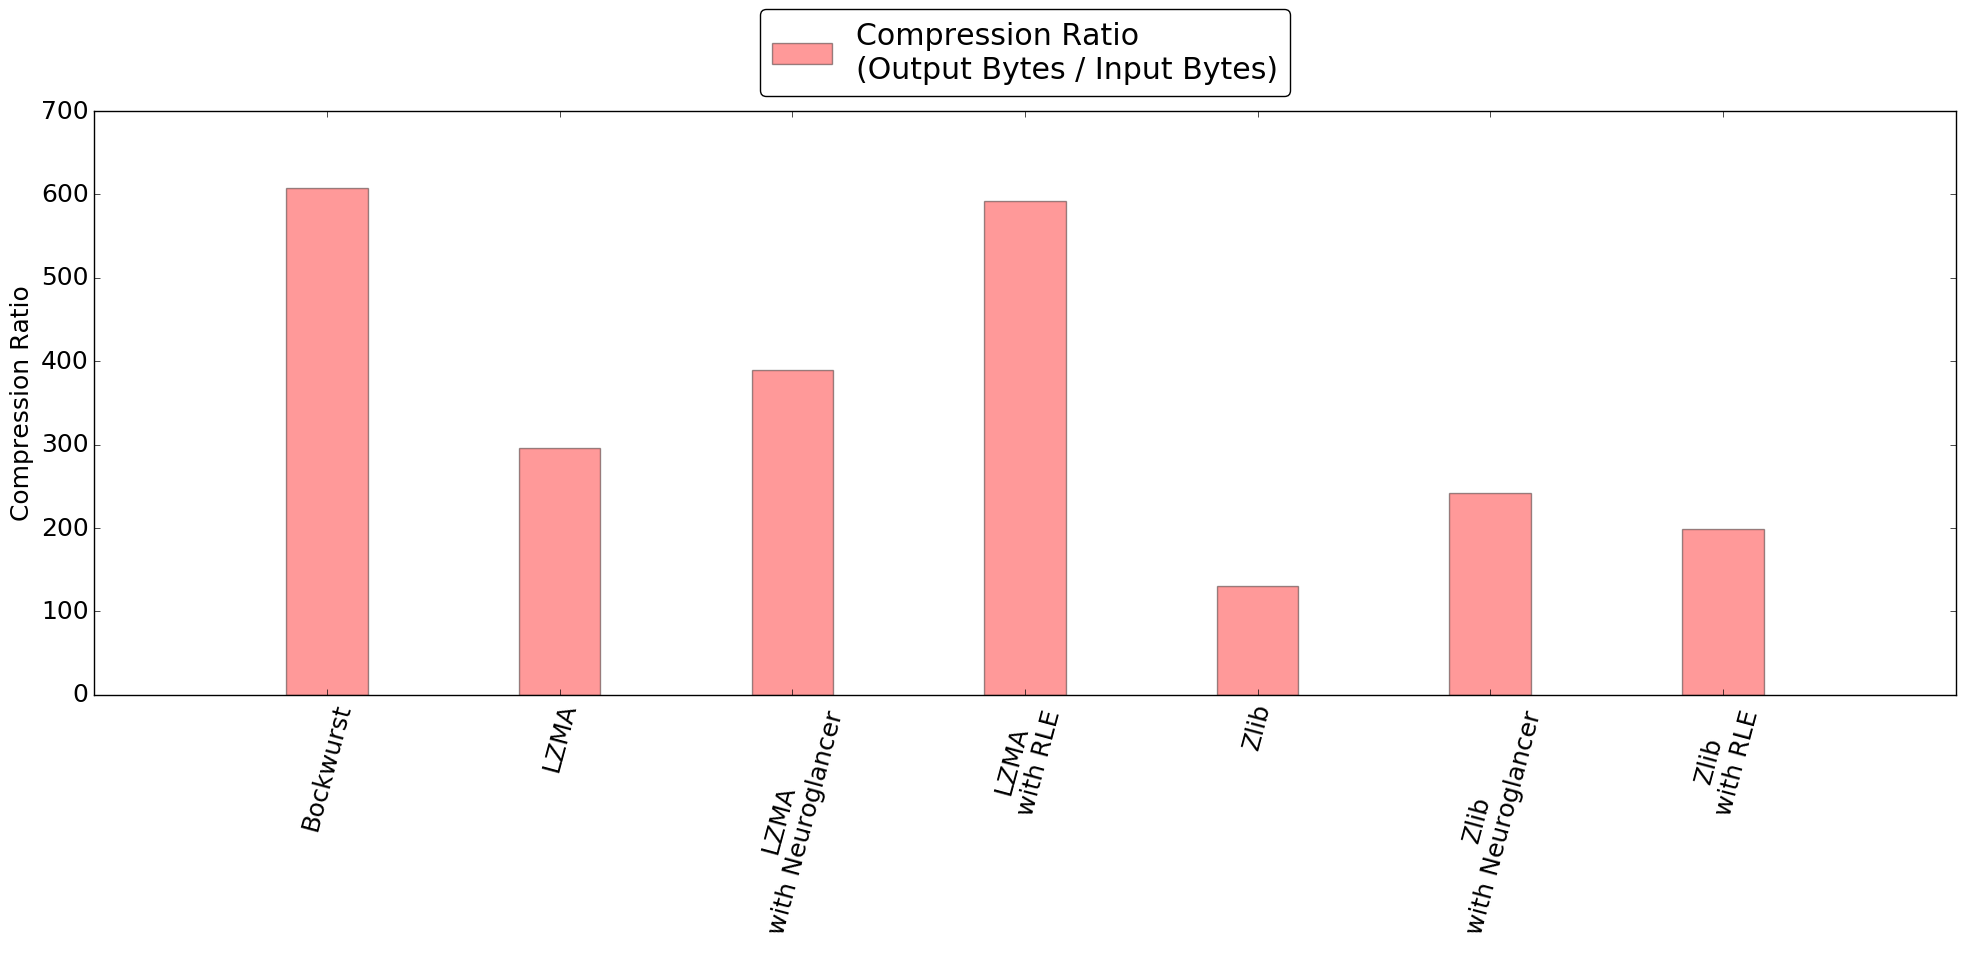

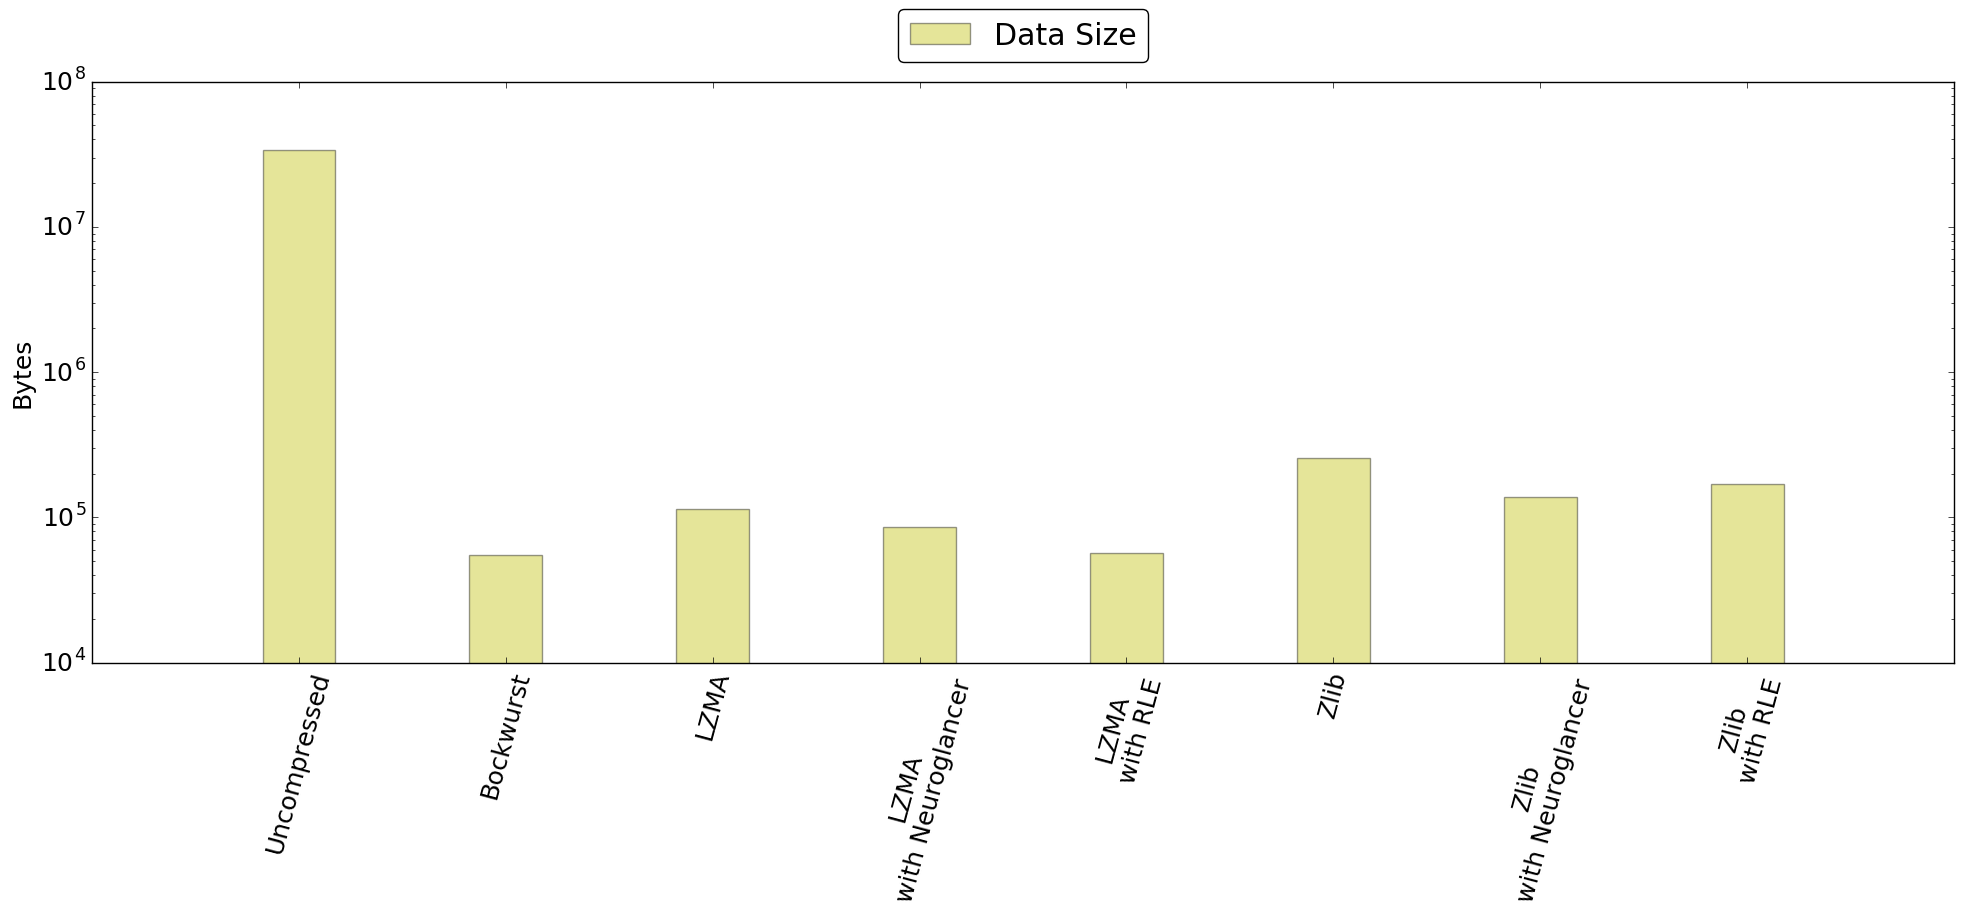

In [18]:
# PLOT: default

C.Util.plot(
    results_default['methods'],
    results_default['bytes'],
    results_default['ratios'],
    results_default['total_comp_speed'],
    results_default['total_comp_speed_std'],
    results_default['total_decomp_speed'],
    results_default['total_decomp_speed_std'],
    'mri',
    bw=True
)

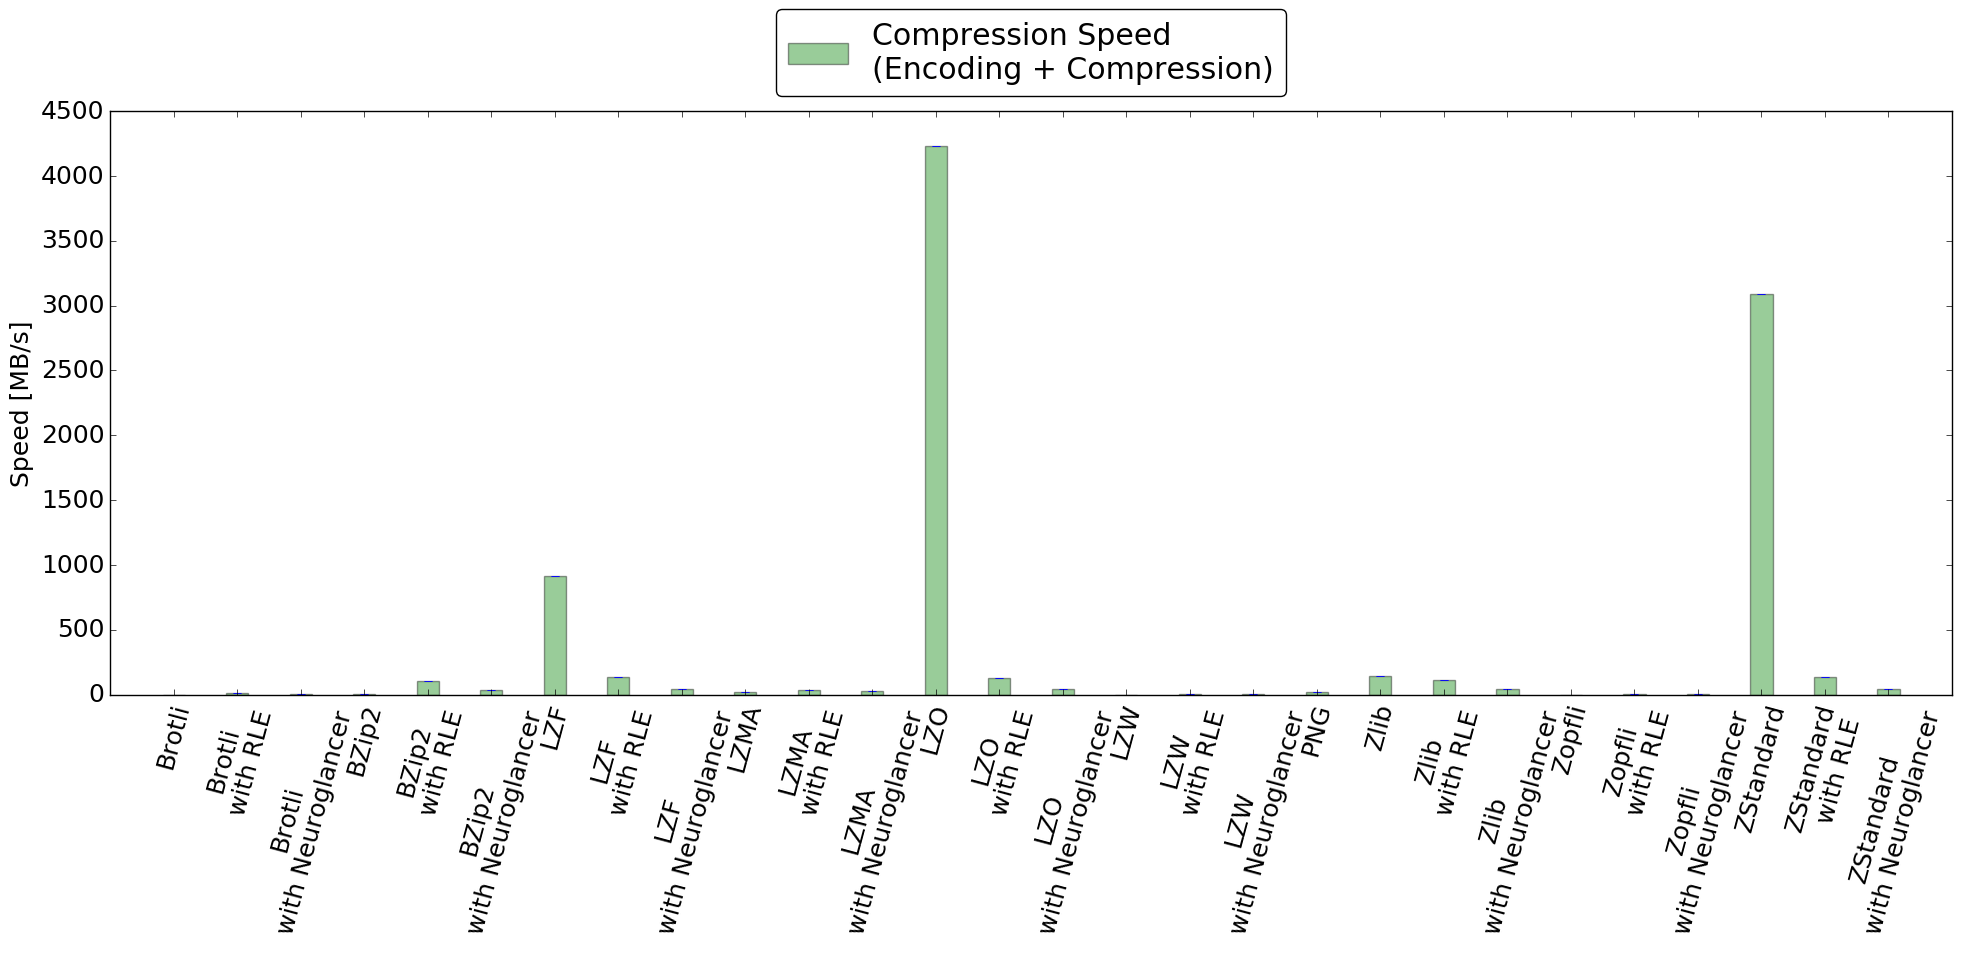

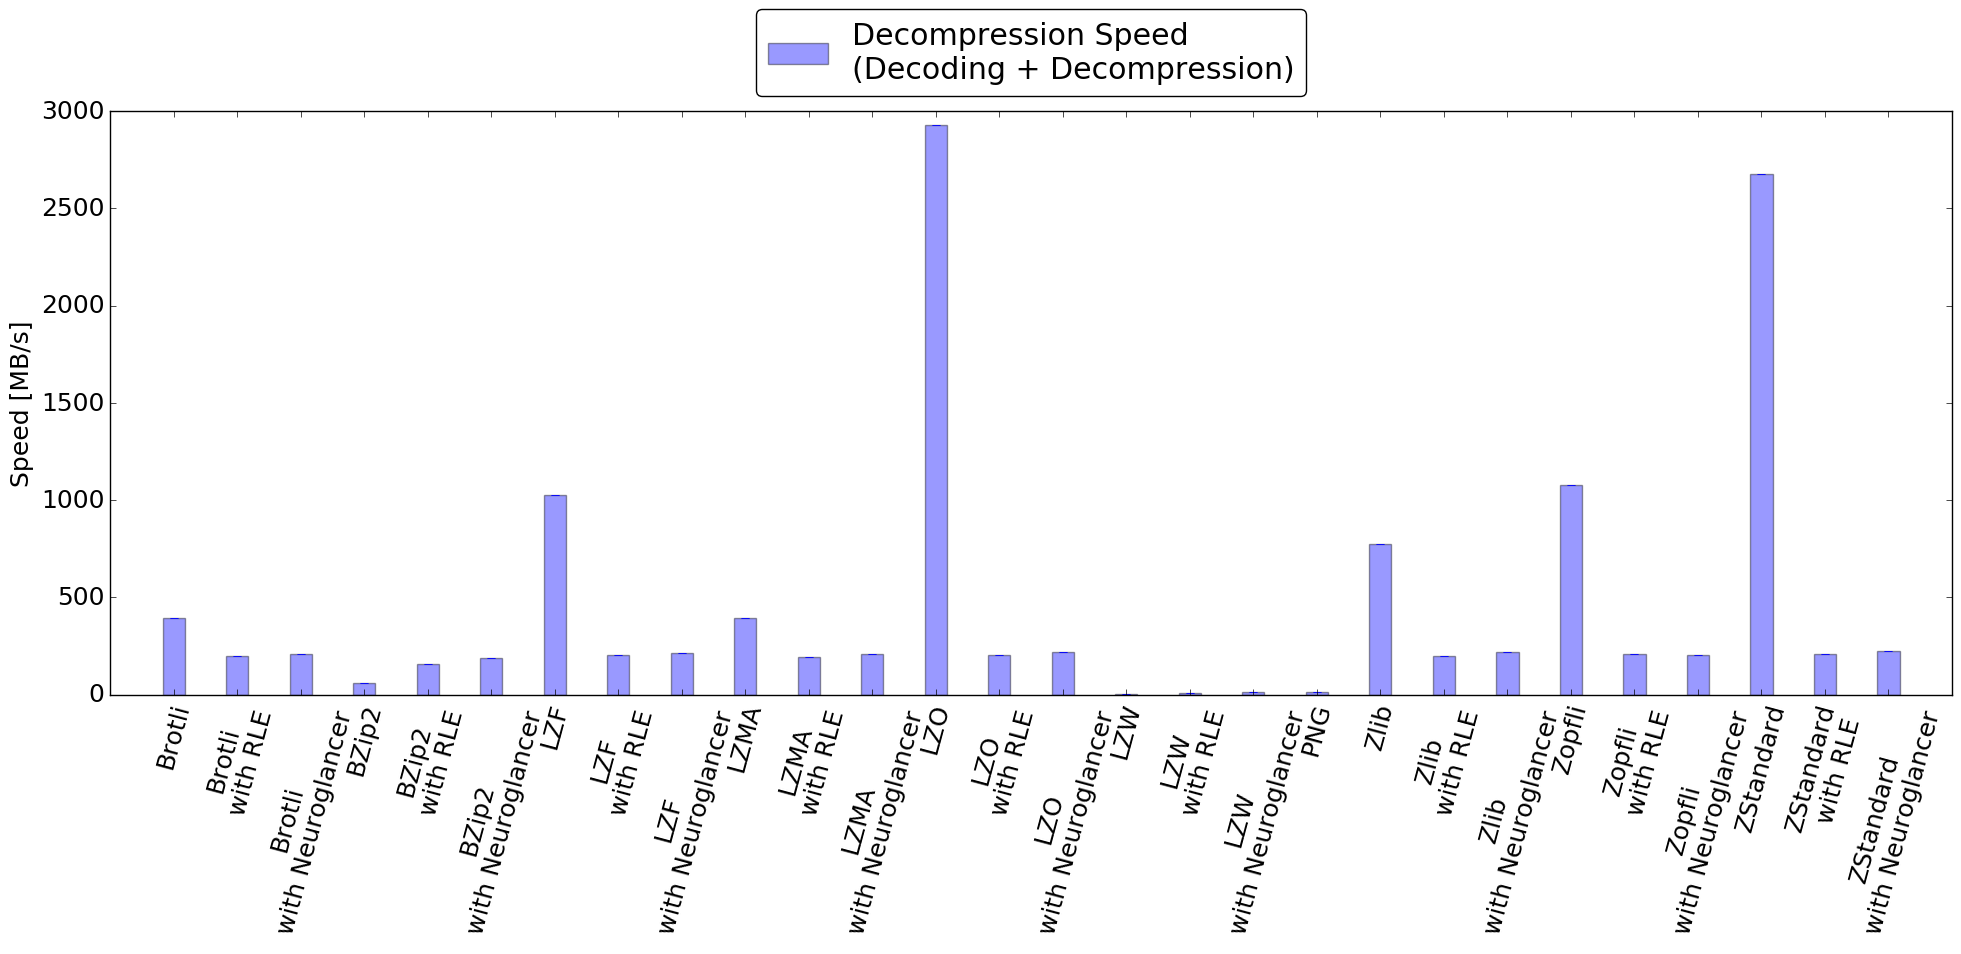

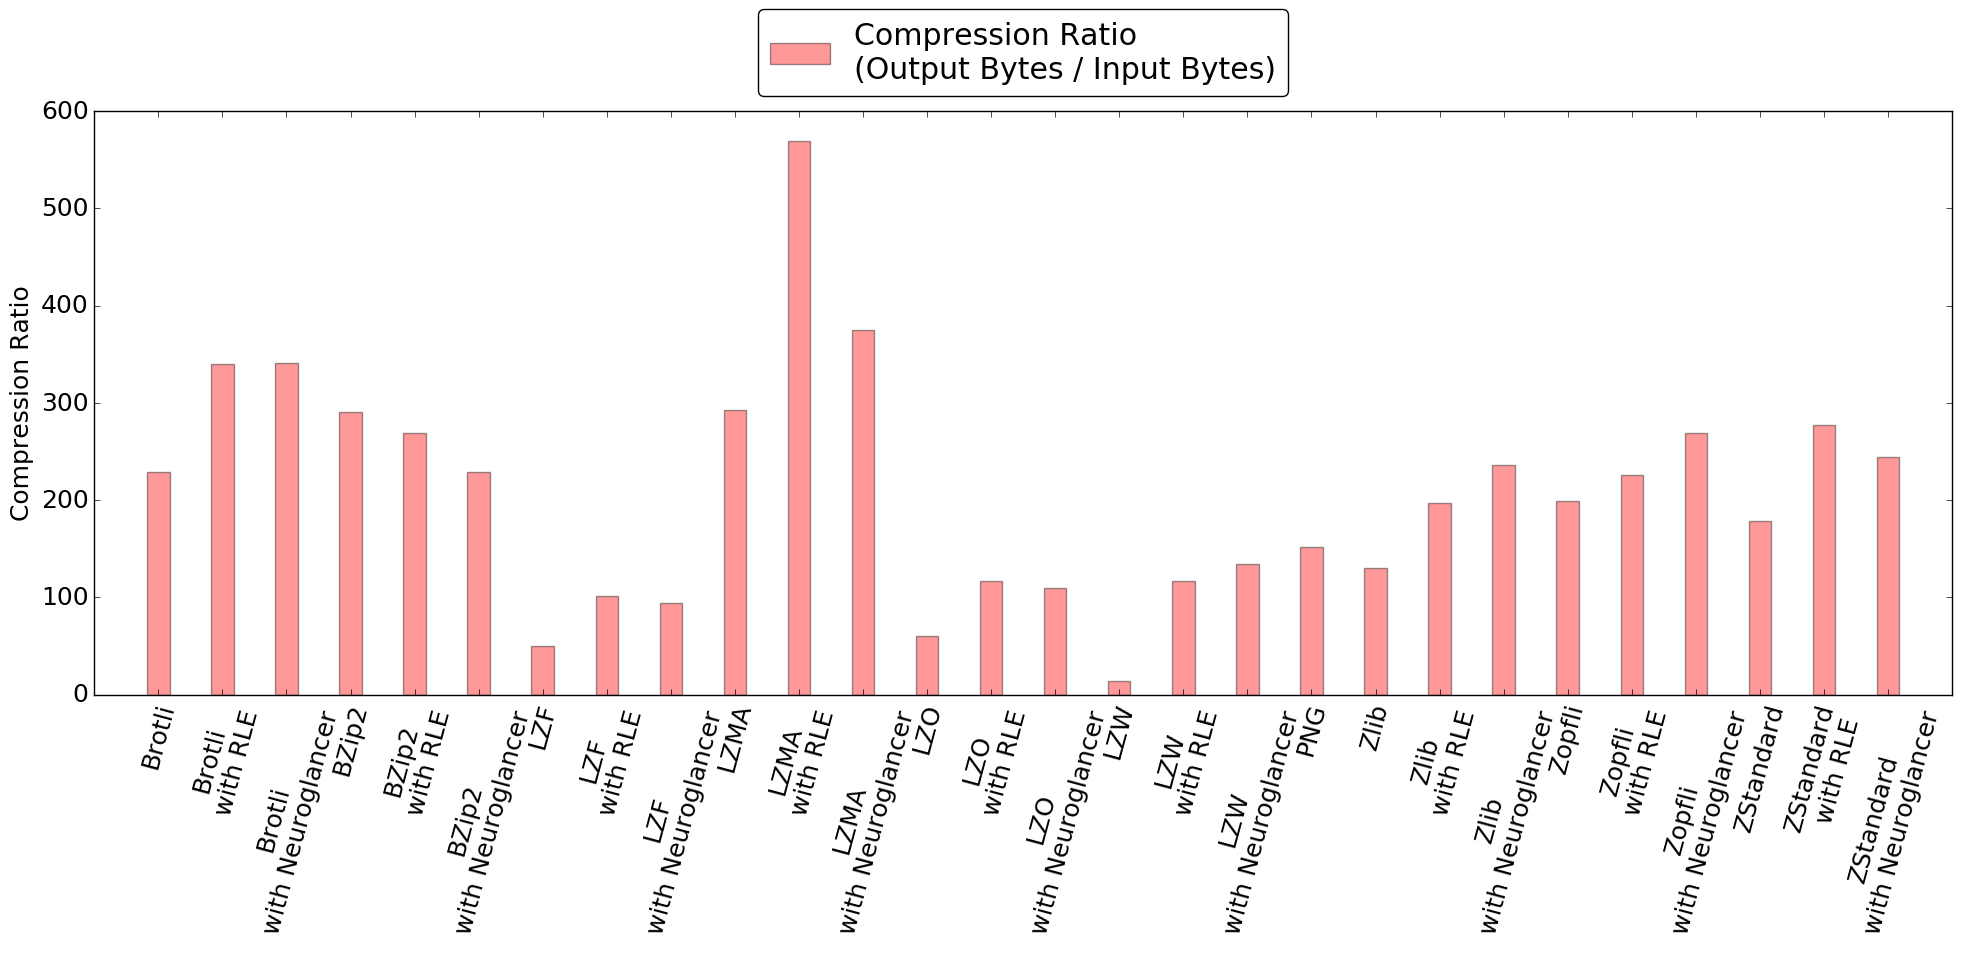

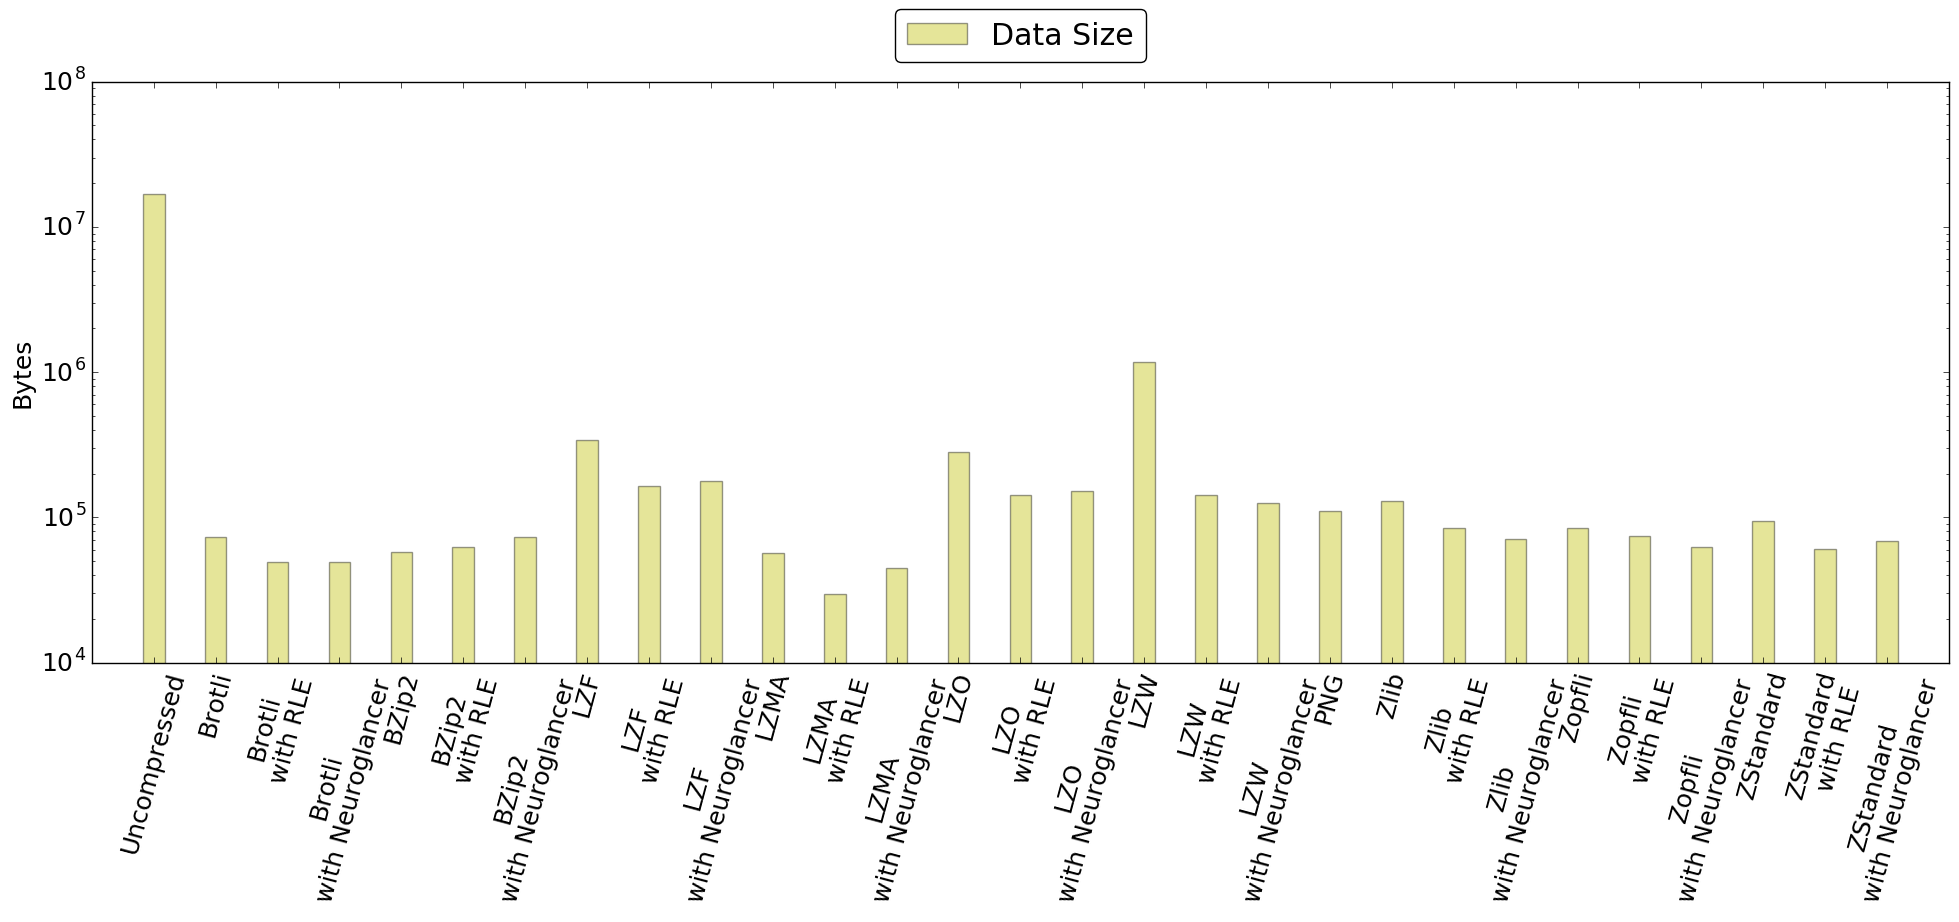

In [26]:
# PLOT: all

C.Util.plot(
    results_all['methods'],
    results_all['bytes'],
    results_all['ratios'],
    results_all['total_comp_speed'],
    results_all['total_comp_speed_std'],
    results_all['total_decomp_speed'],
    results_all['total_decomp_speed_std'],
    'mri',
    bw=True
)

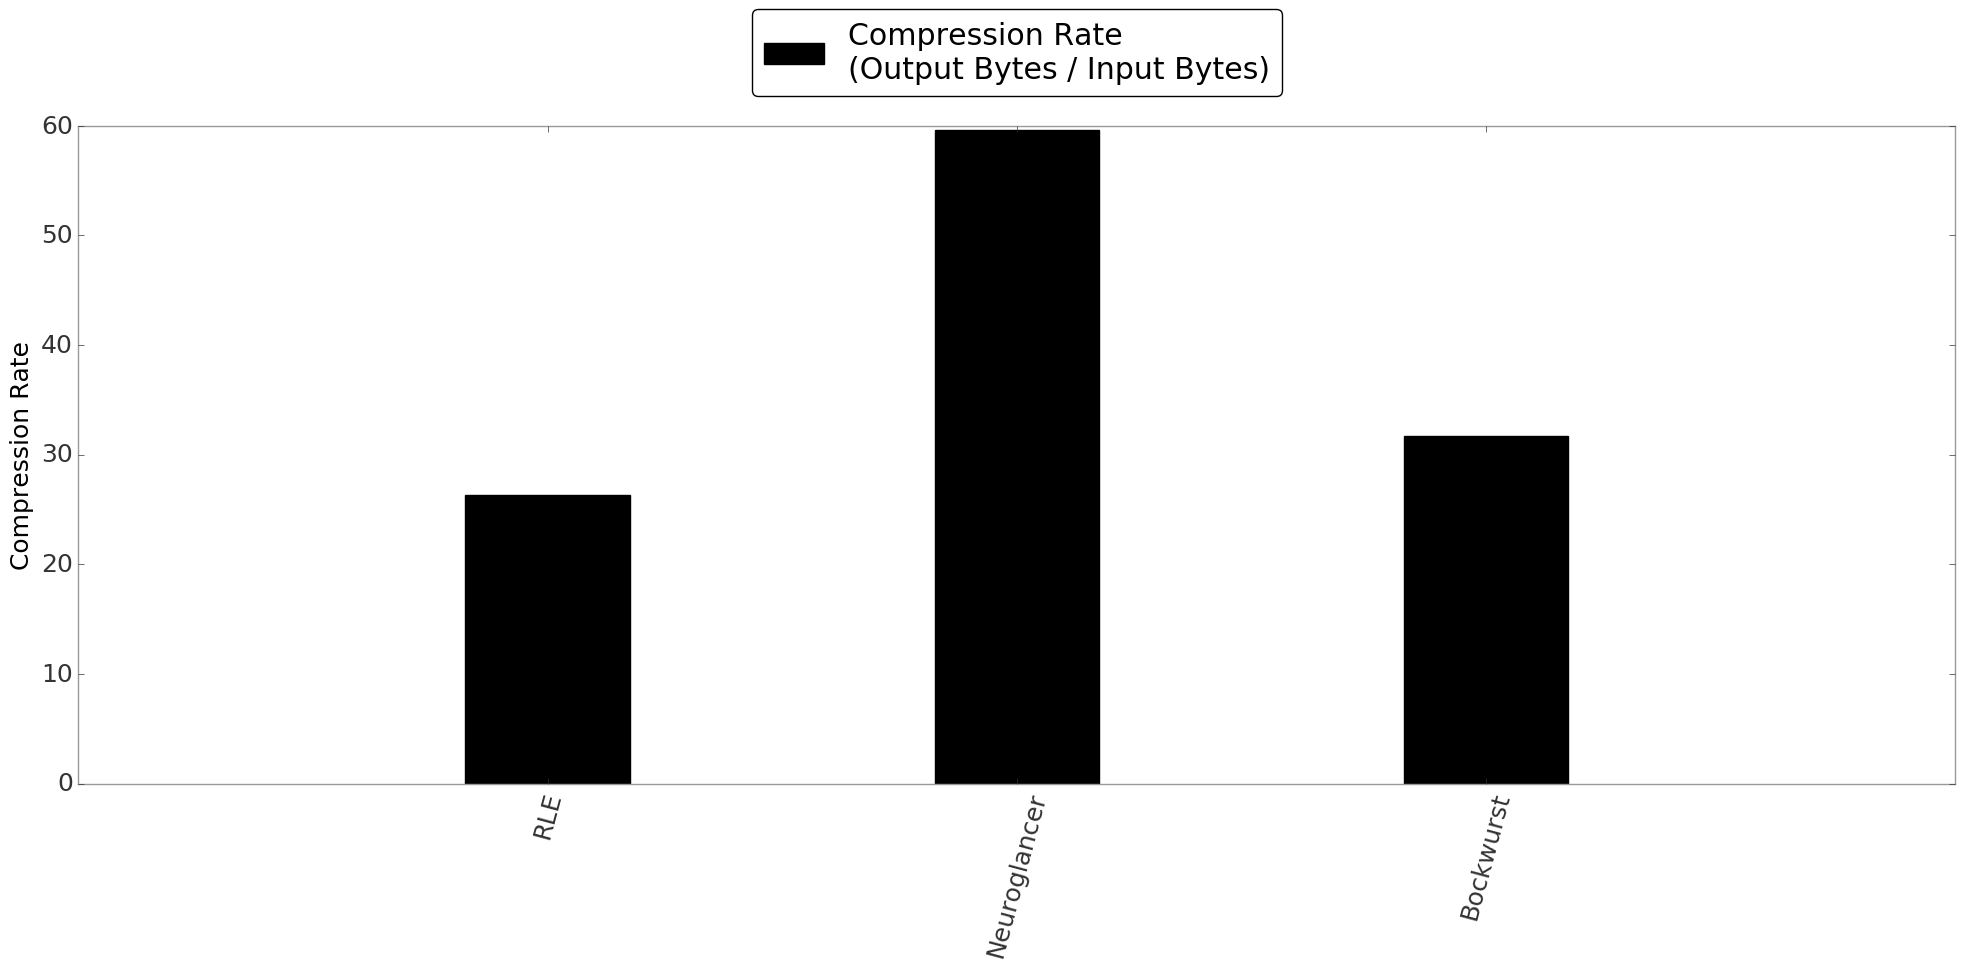

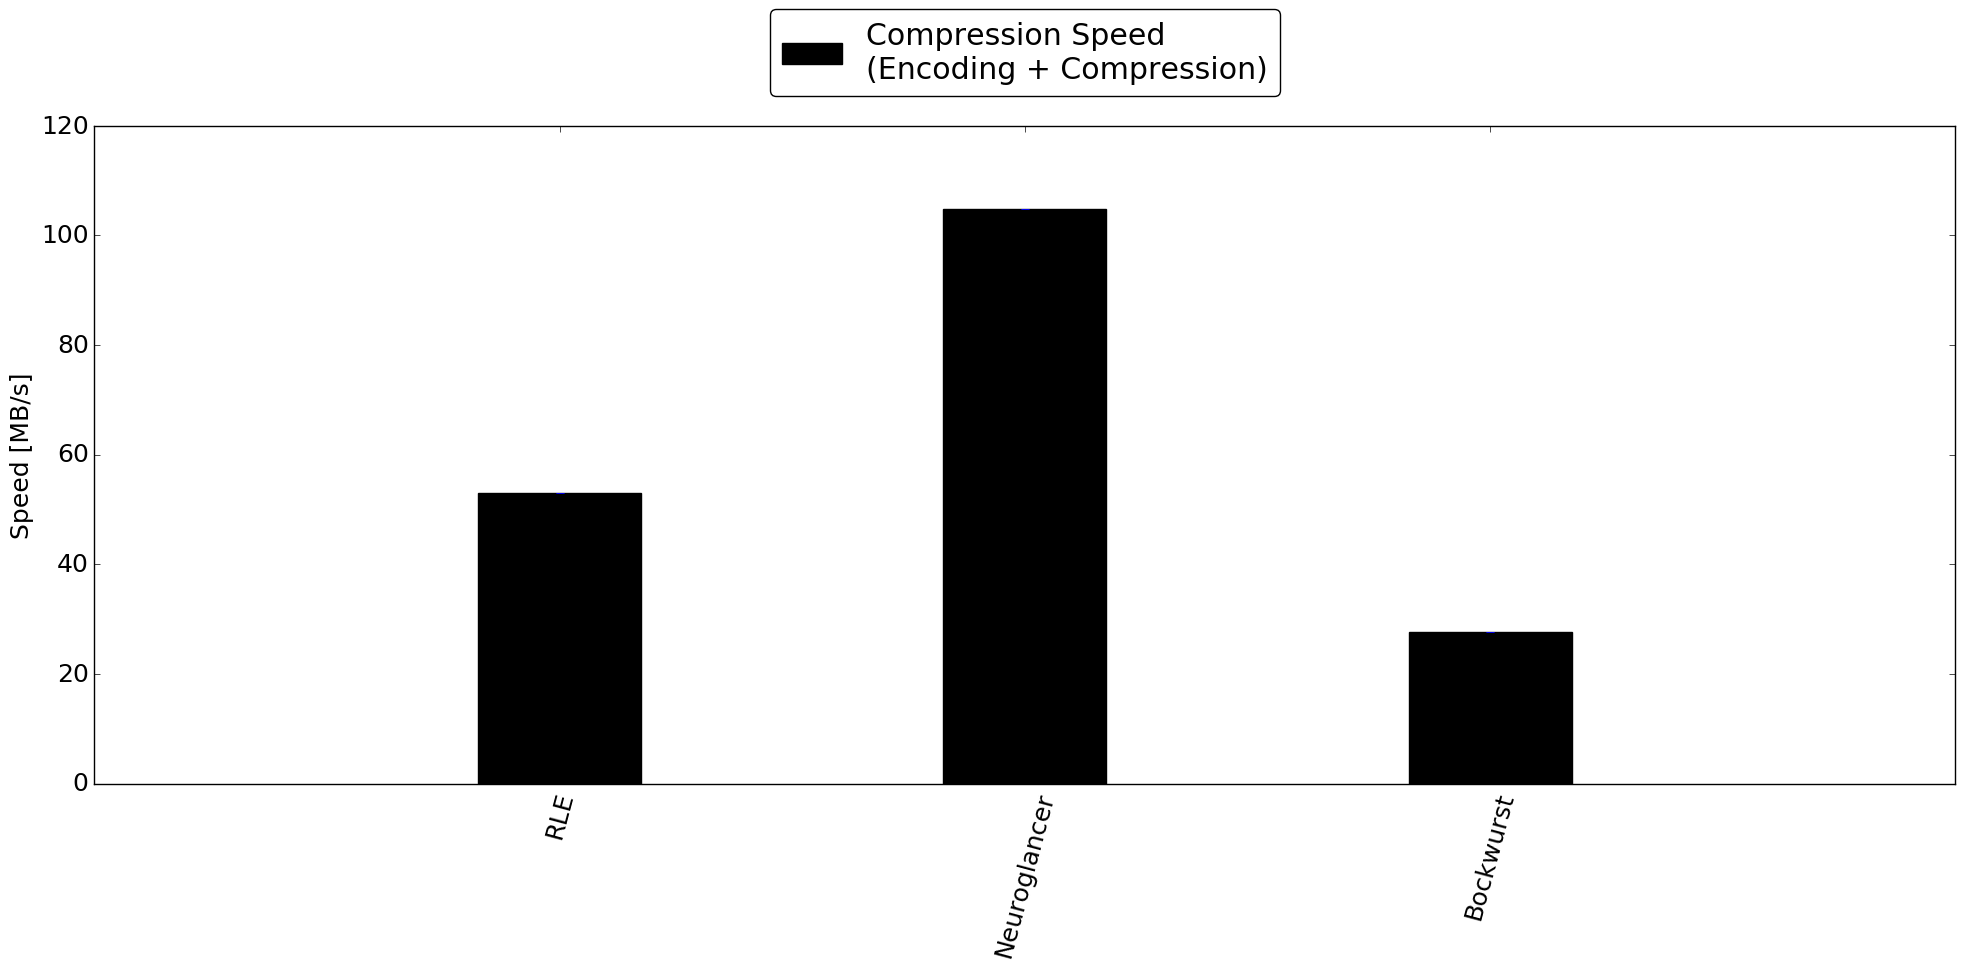

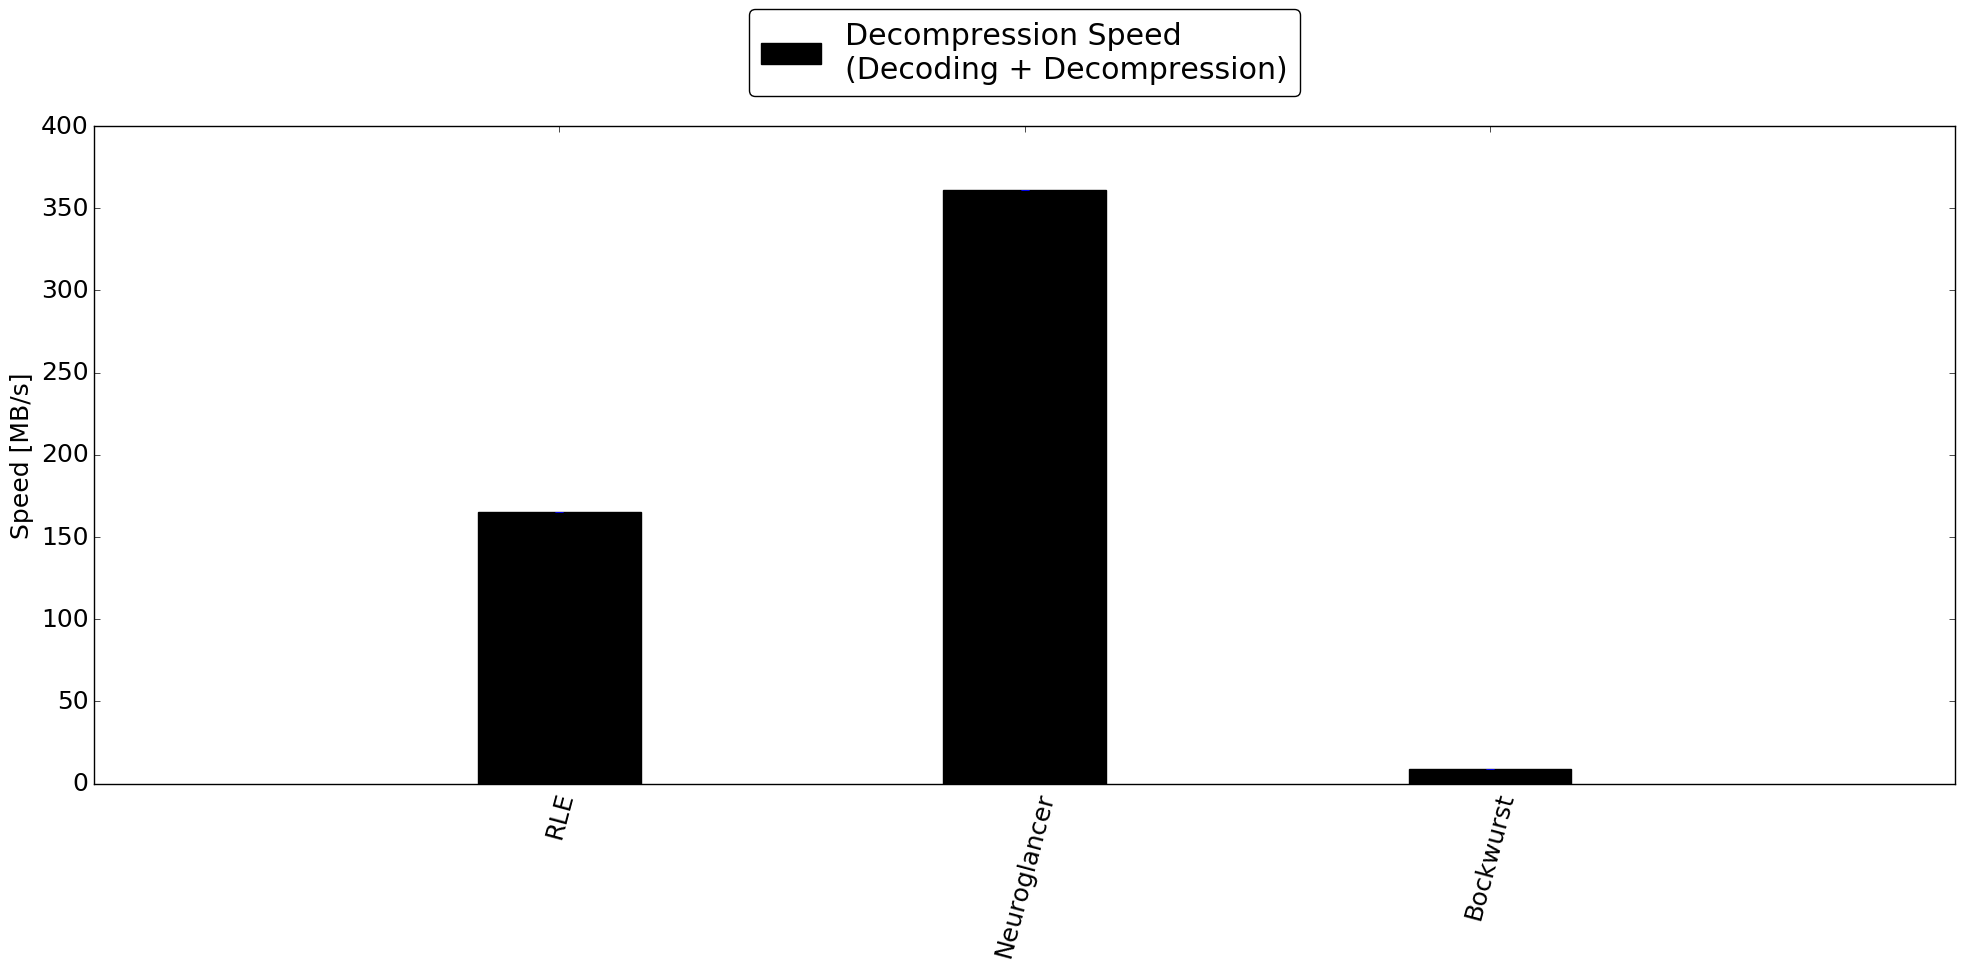

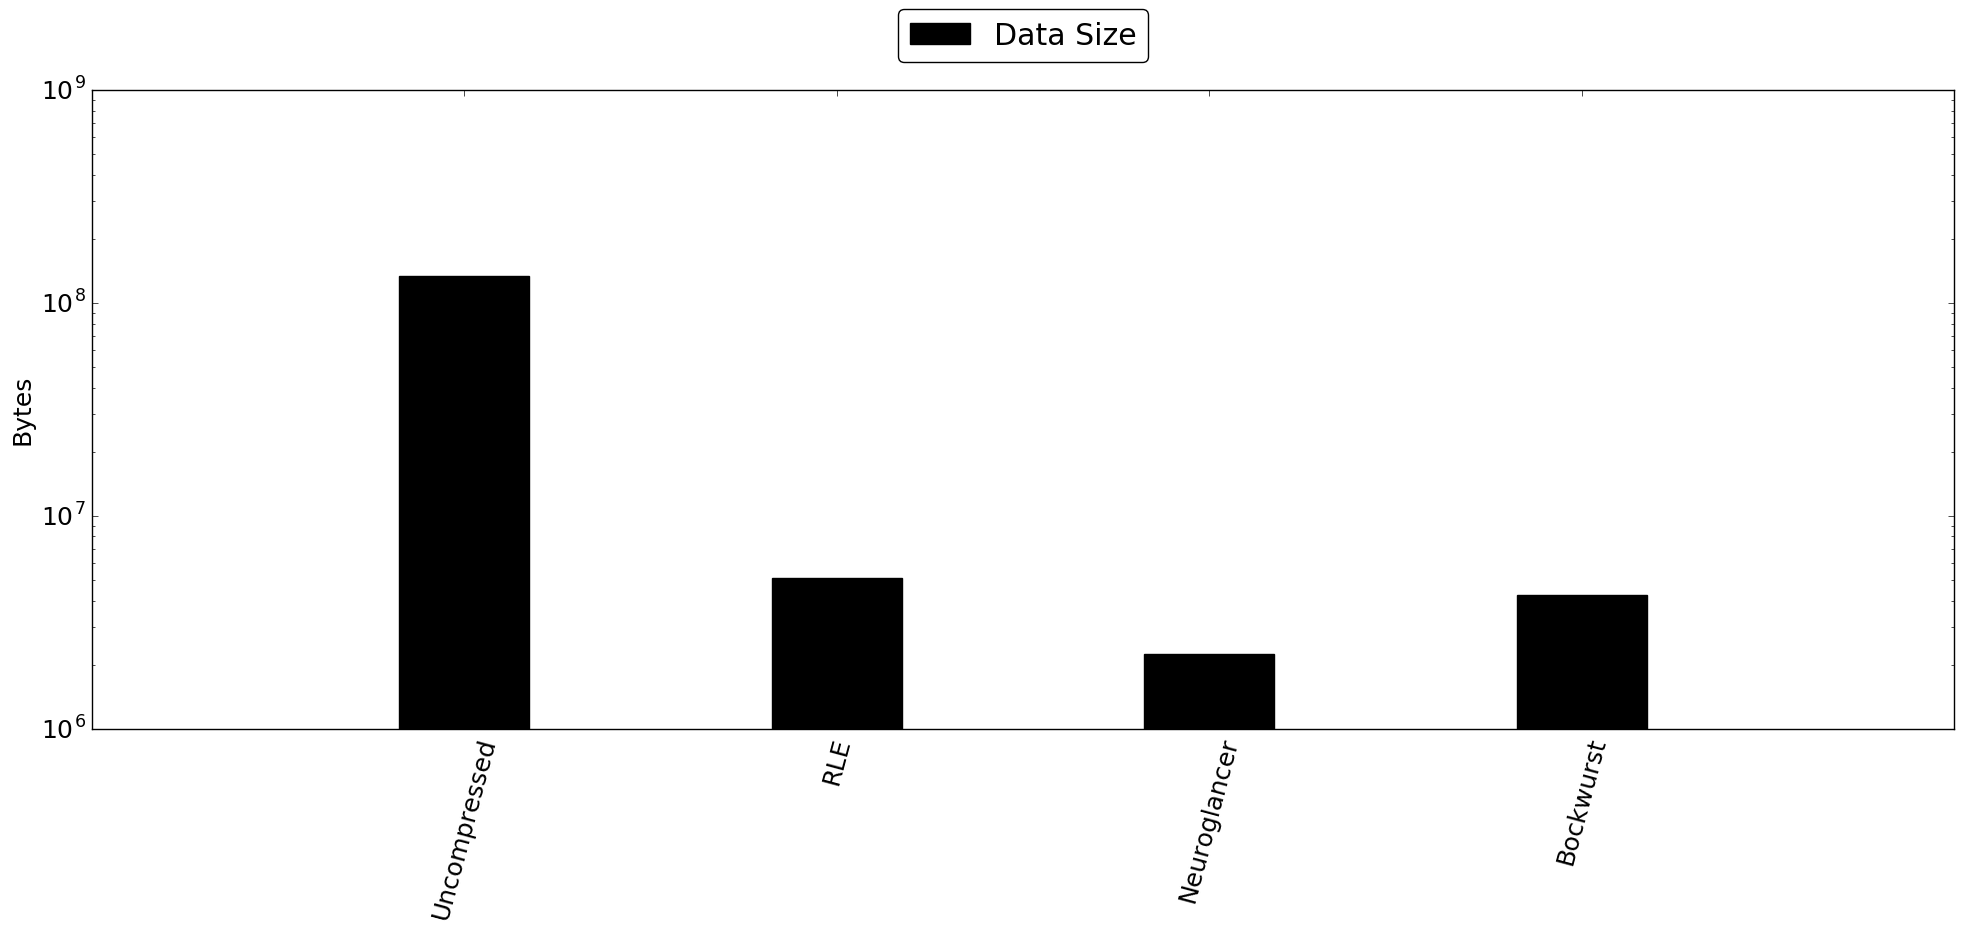

In [8]:
# Plot results

C.Util.plot(
    results_enc_only['methods'],
    results_enc_only['bytes'],
    results_enc_only['ratios'],
    results_enc_only['total_comp_speed'],
    results_enc_only['total_comp_speed_std'],
    results_enc_only['total_decomp_speed'],
    results_enc_only['total_decomp_speed_std'],
    'mri',
    bw=True
)